In [ ]:
# 📊 Exploratory Data Analysis (EDA)
## Bank Term Deposit Subscription Prediction

### Objective:
To explore customer demographic and campaign-related features and understand
their relationship with term deposit subscription (`y`).

This analysis supports:
- Feature selection
- Model interpretability
- Business insights


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


In [5]:
import pandas as pd

df = pd.read_csv("data/processed/cleaned_data.csv")


In [6]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,1,-1,0,failure,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,1,-1,0,failure,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,1,-1,0,failure,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,1,-1,0,failure,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,1,-1,0,failure,no


In [7]:
df.shape


(45211, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [10]:
df["y"].value_counts(normalize=True) * 100


y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64

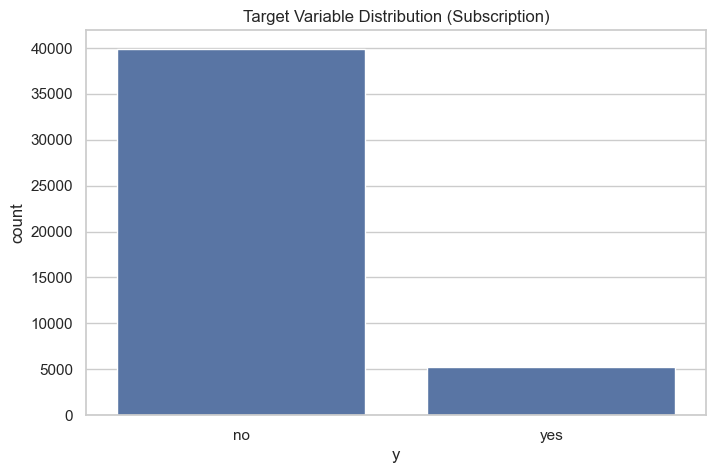

In [11]:
sns.countplot(data=df, x="y")
plt.title("Target Variable Distribution (Subscription)")
plt.show()


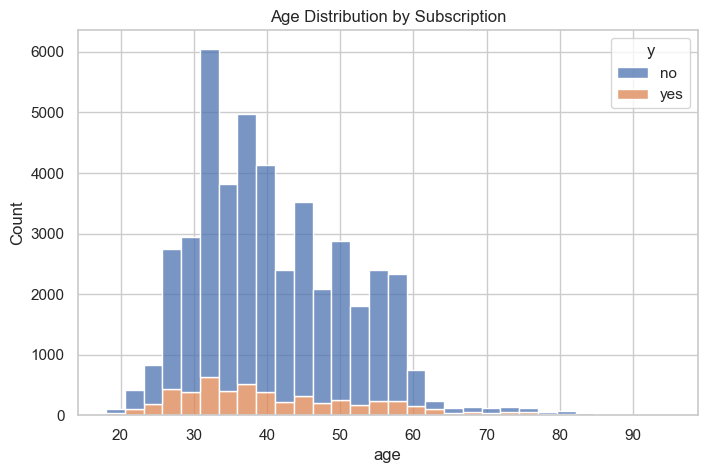

In [12]:
sns.histplot(data=df, x="age", hue="y", bins=30, multiple="stack")
plt.title("Age Distribution by Subscription")
plt.show()


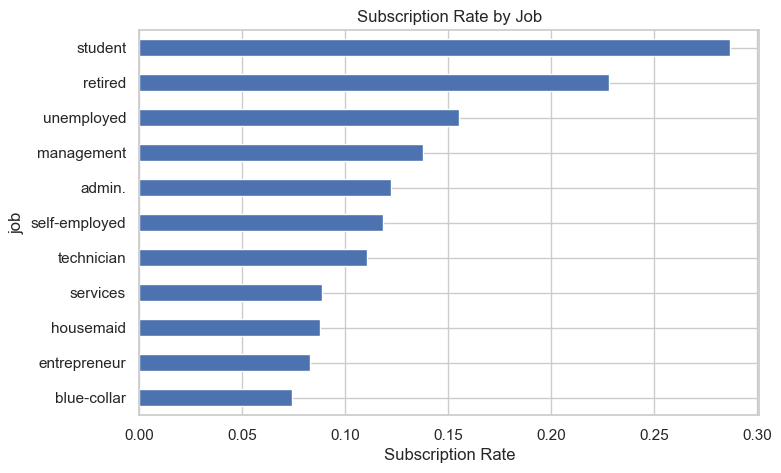

In [13]:
job_rate = df.groupby("job")["y"].apply(lambda x: (x == "yes").mean())
job_rate.sort_values().plot(kind="barh")
plt.title("Subscription Rate by Job")
plt.xlabel("Subscription Rate")
plt.show()


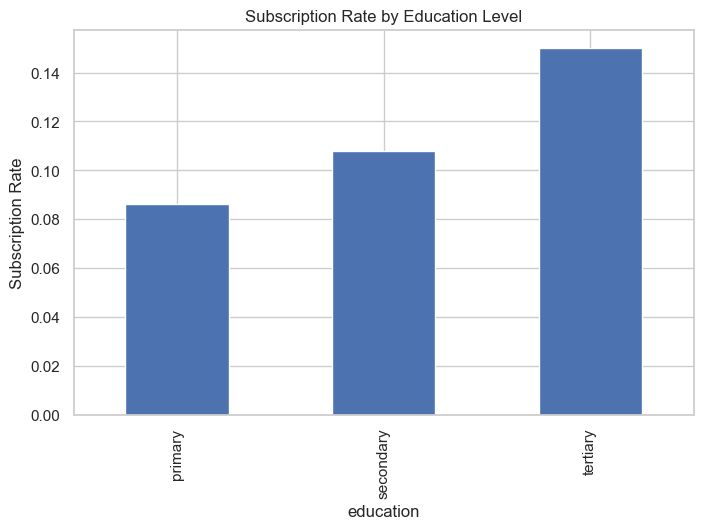

In [14]:
edu_rate = df.groupby("education")["y"].apply(lambda x: (x == "yes").mean())
edu_rate.plot(kind="bar")
plt.title("Subscription Rate by Education Level")
plt.ylabel("Subscription Rate")
plt.show()


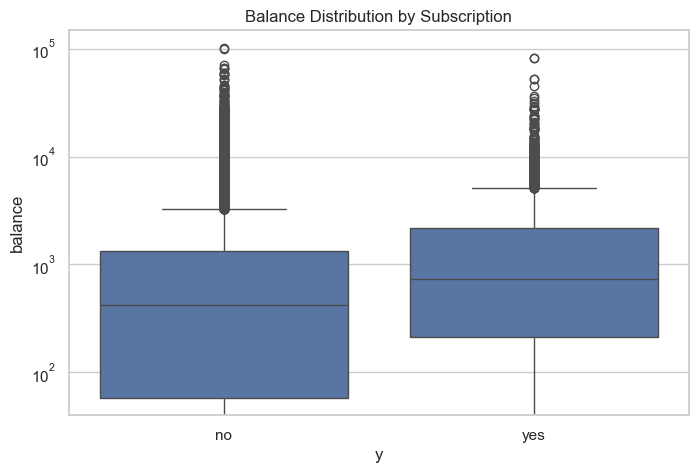

In [15]:
sns.boxplot(data=df, x="y", y="balance")
plt.yscale("log")
plt.title("Balance Distribution by Subscription")
plt.show()


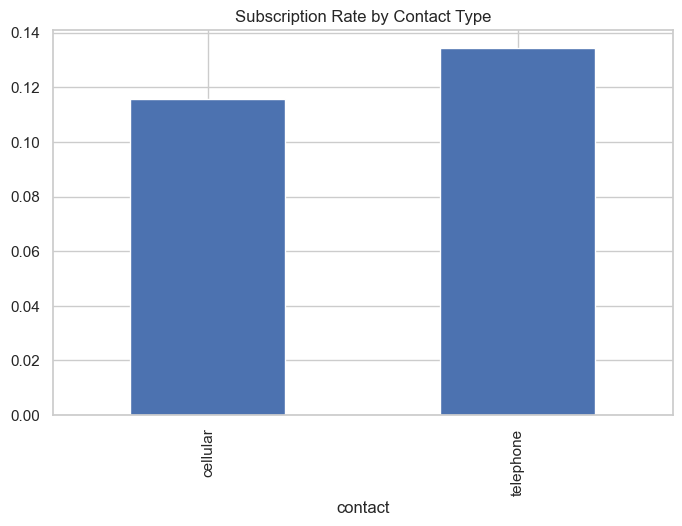

In [16]:
contact_rate = df.groupby("contact")["y"].apply(lambda x: (x == "yes").mean())
contact_rate.plot(kind="bar")
plt.title("Subscription Rate by Contact Type")
plt.show()


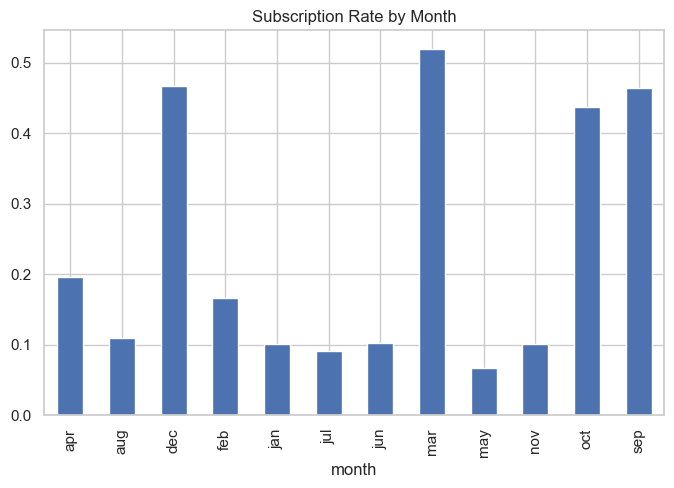

In [17]:
month_rate = df.groupby("month")["y"].apply(lambda x: (x == "yes").mean())
month_rate.plot(kind="bar")
plt.title("Subscription Rate by Month")
plt.show()


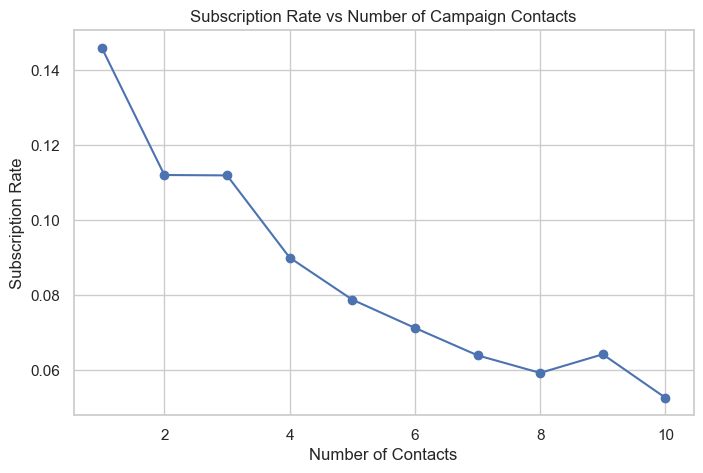

In [18]:
campaign_rate = df.groupby("campaign")["y"].apply(lambda x: (x == "yes").mean())

campaign_rate[campaign_rate.index <= 10].plot(marker="o")
plt.title("Subscription Rate vs Number of Campaign Contacts")
plt.xlabel("Number of Contacts")
plt.ylabel("Subscription Rate")
plt.show()


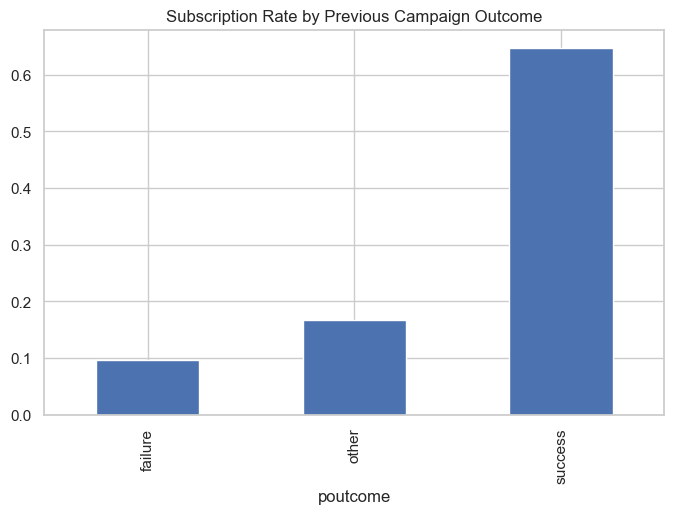

In [19]:
pout_rate = df.groupby("poutcome")["y"].apply(lambda x: (x == "yes").mean())
pout_rate.plot(kind="bar")
plt.title("Subscription Rate by Previous Campaign Outcome")
plt.show()
